In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Case Study.xlsx' 
df = pd.read_excel(path)

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df=df[['Customer ID','Invoice','StockCode','Description','Quantity','Price','InvoiceDate','Country']]

In [ ]:
df.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,InvoiceDate,Country
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-01-12 07:45:00,United Kingdom
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,2009-01-12 07:45:00,United Kingdom
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,2009-01-12 07:45:00,United Kingdom
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-01-12 07:45:00,United Kingdom
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-01-12 07:45:00,United Kingdom


In [ ]:
# Count Missing Values
df.isnull().sum()

Customer ID    235287
Invoice             0
StockCode           0
Description      4275
Quantity            0
Price               0
InvoiceDate         0
Country             0
dtype: int64

Based on the dataset, this company is online retail across **42 countries** like **Australia, Austria, Bahrain, Belgium, Bermuda, Brazil, Canada, Channel Islands, Cyprus, Czech Republic, Denmark, EIRE, European Community, Finland, France, Germany, Greece, Hong Kong, Iceland, Israel, Italy, Japan, Korea, Lebanon, Lithuania, Malta, Netherlands, Nigeria, Norway, Poland, Portugal, RSA, Saudi Arabia, Singapore, Spain, Sweden, Switzerland, Thailand, United Arab Emirates, United Kingdom, USA, West Indies.**


In [ ]:
# Find the Total Amount of Sales
TotalAmount = df['Price'] * df['Quantity']

In [ ]:
new_df = df[['Customer ID','Invoice','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]
new_df2 = df.copy()

In [ ]:
new_df.head()

,Customer ID,Invoice,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,13085.0,489434,85048,12,83.4,2009-01-12 07:45:00,United Kingdom
1,13085.0,489434,79323P,12,81.0,2009-01-12 07:45:00,United Kingdom
2,13085.0,489434,79323W,12,81.0,2009-01-12 07:45:00,United Kingdom
3,13085.0,489434,22041,48,100.8,2009-01-12 07:45:00,United Kingdom
4,13085.0,489434,21232,24,30.0,2009-01-12 07:45:00,United Kingdom


In [ ]:
# Grouping countries by TotalAmount of Sales
country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          8544941
Netherlands              381854
EIRE                     327618
Denmark                  234764
Germany                  222030
France                   181768
Australia                103385
Sweden                    87875
Switzerland               52268
Spain                     44689
Belgium                   34604
Japan                     30138
Portugal                  27398
Norway                    23528
Channel Islands           20393
Italy                     15147
Finland                   14317
Austria                   11306
Cyprus                    10688
Greece                     7707
Hong Kong                  7075
Singapore                  6987
United Arab Emirates       6728
Unspecified                6716
Poland                     5504
Israel                     5485
USA                        3700
Canada                     3657
Iceland                    2967
Bermuda                    2798
Thailand                   2552


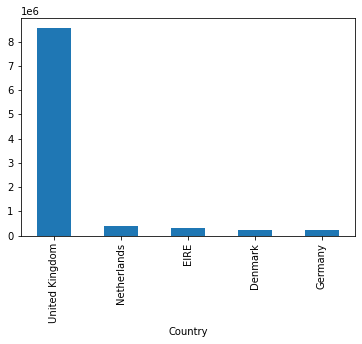

In [ ]:
# Top 5 Countries with highest number of purchase
country_price[:5].plot(kind = 'bar')

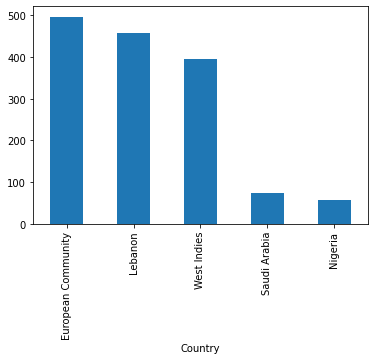

In [ ]:
# Top 5 Countries with least number of purchase
country_price[38:].plot(kind = 'bar')

As it shown on graphs, top 5 countries that has highest sales are **United Kingdom Netherlands, EIRE, Denmark, Germany** with top 5 countries that has least highest sales are **European Community, Lebanon, West Indies, Saudi Arabia, Nigeria.**

In [ ]:
# Removing the null values on Customer and Description
new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,Customer ID,Invoice,StockCode,Description,Quantity,Price,InvoiceDate,Country,TotalAmount
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-01-12 07:45:00,United Kingdom,83.4
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,6.75,2009-01-12 07:45:00,United Kingdom,81.0
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,2009-01-12 07:45:00,United Kingdom,81.0
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-01-12 07:45:00,United Kingdom,100.8
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-01-12 07:45:00,United Kingdom,30.0


In [ ]:
# Sales Average of each product
avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Quantity,TotalAmount
StockCode,Description,,
16044,POP-ART FLUORESCENT PENS,3096.000000,194.400000
85220,SMALL FAIRY CAKE FRIDGE MAGNETS,1389.000000,461.335714
37410,BLACK AND WHITE PAISLEY FLOWER MUG,1351.526316,158.530000
37351,ORANGE FLOWER MUG,770.714286,81.672857
85218,S/5 MINI ICE CREAM FRIDGE MAGNETS,663.000000,206.950000
...,...,...,...
21315,LARGE GLASS HEART TRINKET POT,-4.000000,-17.000000
35976B,WHITE SCANDINAVIAN HEART CHRISTMAS,-5.500000,-6.875000
22003,VINTAGE BLUE VACUUM FLASK 0.5L,-10.000000,-67.500000


We can see the demand for each product and the total amount. It shown that **Pop-Art Fluorescent Pen**s is the best-selling product and **Set 6 Mini Sushi Set Fridge Magnets** is the least-selling product.